# Show the sun rising and setting and the apparent retrograde motion of Mercury

Import the skyfield library and matplotlib for plotting:

In [2]:
from skyfield.api import load, N, W, wgs84, Star
import matplotlib.pyplot as plot

Load the JPL planetary ephemeris DE421 (covers 1900-2050).

In [3]:
planets=load('data/de421.bsp')
earth=planets['earth']
mars=planets['mars']
mercury=planets['mercury']
venus=planets['venus']
sun=planets['sun']
ts=load.timescale()
knoxville = earth + wgs84.latlon(35.9617*N,83.9232*W)

We compute the altitude and azimuth of the Sun in Knoxville, 
beginning at 8am on Aug. 19th, 2021, and ending at 4pm. Note
that UTC is 5 hours ahead of Knoxville time. In order to do
the polar plot, we have to convert azimuth to radians. Also,
the orientation of the angular coordinate in matplotlib's polar
plot is not what we expect, so we plot 90-az instead of az.
Same with alt. 

In [4]:
alt=[]
az=[]
for hr in range(13,23):
    t=ts.utc(2021,8,19,hr,0)
    astrometric = knoxville.at(t).observe(mars)
    alt0, az0, d = astrometric.apparent().altaz()
    alt.append(90-alt0.degrees)
    az.append((90-az0.degrees)/180*3.14159)

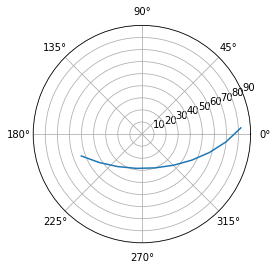

In [5]:
fig,ax=plot.subplots(subplot_kw={'projection': 'polar'})
ax.plot(az,alt)
ax.set_rmax(90)

Mercury is in retrograde in early 2020, so we first show this by plotting the RA and Dec (in degrees) during this time, always at 6am UTC:

In [6]:
ra=[]
dec=[]
alt=[]
az=[]
# Start on Jan 15th, 2020
t0=ts.utc(2020,1,15,6,0)
for day in range(0,90,2):
    # Convert the time object to Julian days, add a fixed number
    # of days, then convert back to a skyfield Time object
    t=ts.tt_jd(t0.tt+day)
    astrometric = knoxville.at(t).observe(mercury)
    ra0, dec0, d = astrometric.apparent().radec()
    alt0, az0, d = astrometric.apparent().altaz()
    tmp=ra0._degrees
    if tmp>180:
        tmp=tmp-360
    tmp2=az0.degrees
    if (tmp2>180):
        tmp2=tmp2-360
    ra.append(tmp)
    dec.append(dec0.degrees)
    alt.append(alt0.degrees)
    az.append(tmp2)

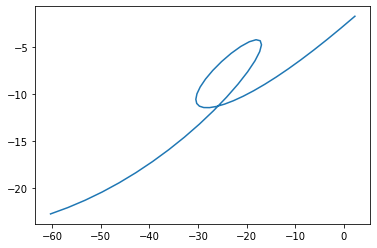

In [7]:
plot.plot(ra,dec)

Next we show the altitude and aziumth in Knoxville. Mercury is not observable at this time (its altitude is negative so it's below the horizon), and the apparent retrograde motion shows up a bit differently.

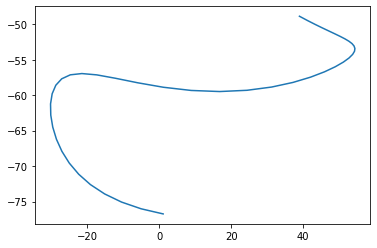

In [8]:
plot.plot(az,alt)